In [1]:
import pandas
from matplotlib import pyplot
from warnings import filterwarnings
filterwarnings('ignore')

df = pandas.read_excel('시도별 전출입 인구수.xlsx')
df.drop(0, axis = 'index', inplace = True)
df['전출지별'].ffill(inplace = True)

# mask를 이용한 index조회 : 조건식을 이용한 True/False 결과로 인덱싱한다.
# 조건1 - 서울특별시에서 전출한 index 조회
# 조건2 - 서울특별시를 제외하고 전입한 index 조회
mask1 = df['전출지별'] == '서울특별시'
mask2 = df['전입지별'] != '서울특별시'
df = df[mask1 & mask2]
df.drop('전출지별', axis = 'columns', inplace = True)
df.set_index('전입지별', inplace = True)

# 서울에서 서울을 제외한 타지역으로 이동한 인구와 관련된 자료(1970 ~ 2022)
df.head(3)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891


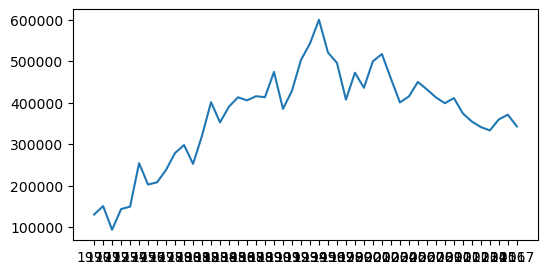

In [3]:
sr1 = df.loc['경기도']

# pyplot.plot(시리즈)       - index가 x축이 되고, values가 데이터가 된다.
# pyplot.plot(배열1, 배열2) - 배열1이 x축이 되고, 배열2가 데이터가 된다.
pyplot.figure(figsize = (6, 3))
#pyplot.plot(sr1)
pyplot.plot(sr1.index, sr1.values)

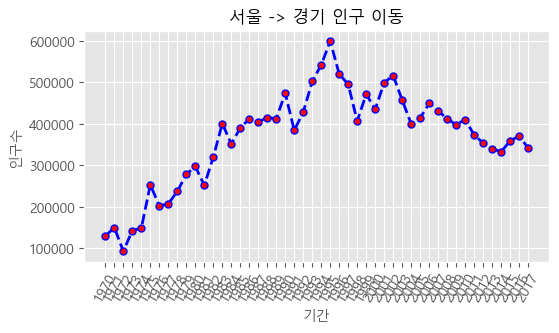

In [9]:
# pyplot.plot(데이터, ls = '라인스타일', linesidth = 굵기, color = '색깔',
#             marker = '마커스타일', markersize = 크기, markerfacecolor = '마커색깔')
pyplot.figure(figsize = (6, 3))
pyplot.plot(sr1, ls = '--', linewidth = 2, color = 'blue',
            marker = 'o', markersize = 5, markerfacecolor = 'red')
pyplot.title('서울 -> 경기 인구 이동', size = 12)
pyplot.xlabel('기간', size = 10)
pyplot.ylabel('인구수', size = 10)
pyplot.xticks(rotation = 60)
pyplot.show()

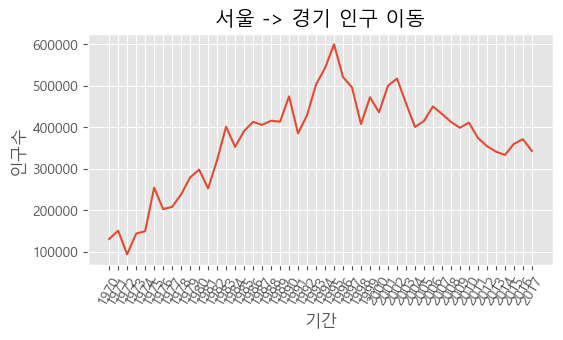

In [4]:
from matplotlib import pyplot
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'malgun.ttf').get_name()
rc('font', family = font_name)

pyplot.style.use('ggplot')
pyplot.figure(figsize = (6, 3))
pyplot.plot(sr1)
pyplot.title('서울 -> 경기 인구 이동')
pyplot.xlabel('기간')
pyplot.ylabel('인구수')
pyplot.xticks(rotation = 60)
pyplot.show()

city_list: 충청남도
city_list: 경상북도
city_list: 강원도
city_list: 전라남도


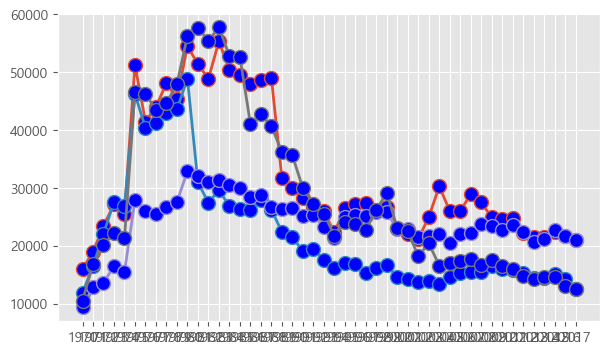

In [25]:
# 충청남도, 경상북도, 강원도, 전라남도
list_place  = ['충청남도', '경상북도', '강원도', '전라남도']
df4 = df.loc[list_place]

figure = pyplot.figure(figsize = (7, 4))
ax = figure.add_subplot(1,1,1)
# ax1 = figure.add_subplot(2,2,1)
# ax2 = figure.add_subplot(2,2,2)
# ax3 = figure.add_subplot(2,2,3)
# ax4 = figure.add_subplot(2,2,4)
# ax1.plot(df4.loc[['충청남도']])
# ax2.plot(df4.loc[['경상북도']])
# ax3.plot(df4.loc[['강원도']])
# ax4.plot(df4.loc[['전라남도']])

for i in list_place:
    print("city_list:",i)
    ax.plot(df4.loc[i],linewidth = 2 ,marker = 'o', markersize =10, markerfacecolor = 'blue')
#     ax.plot(df4.loc['경상북도'],linewidth = 2 ,marker = 'o', markersize =10, markerfacecolor = 'blue')
#     ax.plot(df4.loc['강원도'],linewidth = 2 ,marker = 'o', markersize =10, markerfacecolor = 'blue')
#     ax.plot(df4.loc['전라남도'],linewidth = 2 ,marker = 'o', markersize =10, markerfacecolor = 'blue')
pyplot.show()
